<a href="https://colab.research.google.com/github/dhilligo/PHYS633S22/blob/main/Hilligoss_Dylan_21_Degeneracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color="red">22-Degeneracy (and Radiation) Pressure</font>

In [1]:
import numpy as np, copy
import matplotlib.pyplot as plt
%matplotlib inline
from astropy import constants as const
import astropy.units as u
from astropy.units import cds
cds.enable() 

## 0. To execute:

Here are some models for the Sun, a M10 star, and the Sun towards the end of its main sequence lifetime.

In [2]:
def read_model(file):

    return np.genfromtxt(file, skip_header=5, names=True)

Msun = read_model('https://raw.githubusercontent.com/veropetit/PHYS633-S2022/main/L18-Convection/18-Sun-profile8.data')
MsunOld = read_model('https://raw.githubusercontent.com/veropetit/PHYS633-S2022/main/L21-Degeneracy/21-SunOld-profile15.data')
M10 = read_model('https://raw.githubusercontent.com/veropetit/PHYS633-S2022/main/L18-Convection/18-M10-profile8.data')

## 1. In Class: Degeneracy pressure in normal stars

We will explore the transision zones between ideal gas pressure, non-relativistic degenerate pressure, and relativistic degenerate pressure, in a $\log T$-$\log\rho$ diagram. 

We will use the fill_between function to highlight the regions where the degeneracy pressure (non-relativistic and relativistic should dominate. 

We will also add the $\rho-T$ profiles for a solar model, a 10 Msun model, and a model of the sun towards the end of the hydrogen-burning phase. 

**In the next class** we will also add the transition region for radiation pressure. 

> **TODO**: On the graph, add a vertical line to show the mean density of a white dwarf with the same mass as the sun, and the same radius as the Earth.

<img src="https://github.com/dhilligo/PHYS633S22/blob/main/Calculations/EF5C7B40-78F4-402E-8AFD-087EBAA5B674.jpeg?raw=true" width="500"> 

Text(0, 0.5, '$\\log(T)$')

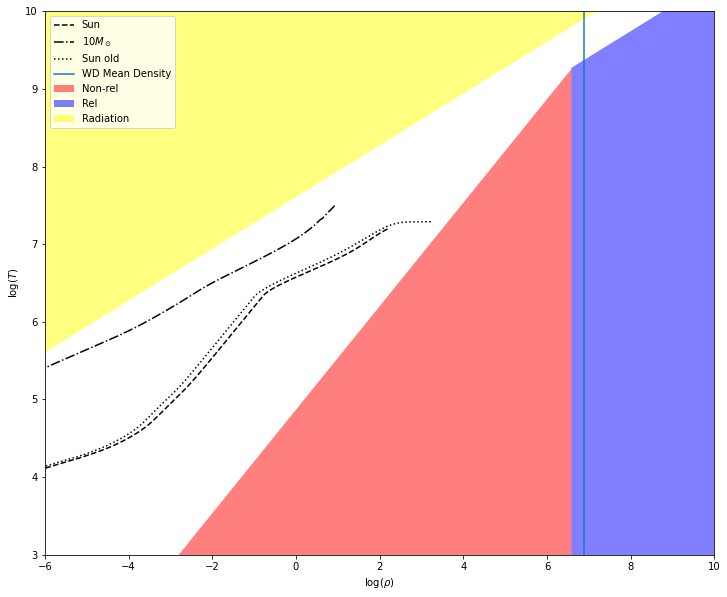

In [3]:
fig, ax = plt.subplots(1,1, figsize=(12,10))
ax.set_xlim(-6,10)
ax.set_ylim(3,10)

## We set the electronic mean molecular weigth to approximatively 2,
## which is more appropriate for regions where the hydrogen is depleted. 
## So note that in reality the boundaries can shift a little bit. 


###################################
###################################
# In class

mu_e = 2.0
###################################
###################################
# In class
rhoT = np.log10(1.9e6 *mu_e)
log_rho = np.array([-6,rhoT])
logT = np.log10((10**log_rho/ mu_e / 2.5e-8)**(2./3.))
ax.fill_between(log_rho, logT, facecolor = 'r', alpha = 0.5, label = 'Non-rel')
log_rho = np.array([rhoT,10])
logT = np.log10((10**log_rho/ mu_e / 2.95e-22)**(1./3.))
ax.fill_between(log_rho, logT, facecolor = 'b', alpha = 0.5, label = 'Rel')
log_rho = np.array([-6,10])
mu = 0.5
logT = 1/3 *(log_rho - np.log10(3.05e-23*mu))
ax.fill_between(log_rho, logT,10, facecolor = 'yellow', alpha = 0.5, label = 'Radiation')
ax.plot(Msun['logRho'], Msun['logT'], color = 'k', ls='--', label = 'Sun')
ax.plot(M10['logRho'], M10['logT'], color = 'k', ls='-.', label = r'$10M_\odot$')
ax.plot(MsunOld['logRho'], MsunOld['logT'], color = 'k', ls=':', label = 'Sun old')
ax.legend(loc='upper left')



###################################
###################################
# At home
MassSol=2*10**33
RadEar=637813700

avg_density=MassSol/(RadEar)**3

ax.axvline(np.log10(avg_density),label='WD Mean Density')
ax.legend(loc='upper left')
#-------------------
plt.rcParams.update({'font.size': 18})
ax.set_xlabel(r'$\log(\rho)$')
ax.set_ylabel(r'$\log(T)$')

> **TODO**: write a caption for your graph (make sure to also include the radiation pressure that we will add in the next lecture). Comment on which type of stars are more likely to have important degeneracy/radiation pressure (also, where in the star). 

## 2. At home: Use the properties of polytrope to understand non-relativistic white dwarfs

White dwarfs are the remnant of solar mass object, once the fusion stops. WD are generally made of elements heavier than He, e.g. carbon or oxygen depending on their evolution. 
In the case were no H or He is present in a gas, the electronic mean molecular weigth $\mu_e\sim2$.

These objects remain in hydrostatic equilibrium because of non-relativistic degeneracy pressure, of the form
$$P_e = 1.00\times10^{13}\left(\frac{\rho}{\mu_e}\right)^{5/3}.$$
The numerical constant is such that the pressure is in dyn/cm2 for a density given in g/cm3.

You probably notice that the pressure does not depend on temperature, just like a polytrop! 

This would correspond to a polytrop of index n=3/2, with $K = 1.00\times10^{13}/\mu_e^{5/3}$. For such a polytrop, $\epsilon_1=3.654$, and $(-\theta(\epsilon_1)')=0.20330$, according to Henson Table 7.1.

> **TODO**
>
> a. Use the property of polytrops to find an expression for $M_\star$ as a function of only $R_\star$ and $K$ (and constants such as G and $\epsilon_1$ etc). Show your work here. 
>
> b. If you have not already done so in a), evaluate the numerical constants such that you get an equation for the mass in solar units if you give the radius in solar units. 
>
> c. Make a plot of the WD radius as a function of mass for a selection of masses between say 0.1 and 10 Msun. 

Text(0.5, 1.0, 'Radius-Mass Relationship for Non-Rel. WDs')

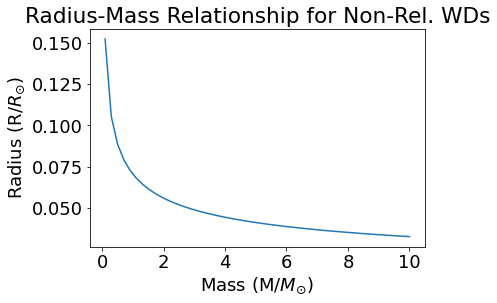

In [10]:
###################################
###################################
# At home

K=1e13/((2)**(5/3))*(u.cm**4/(u.g**(2/3)*u.s**2))
eps1=3.654
theta_p=-0.20330
Mstar=np.linspace(0.1,10,50) * const.M_sun.cgs
R=((-K**(3/2))/(Mstar*np.sqrt(4*np.pi))*(5/(2*const.G.cgs))**(3/2)*(((5*K)/(8*np.pi*const.G.cgs))*(eps1**2))**(3/2)*(eps1**2*theta_p))**3

beta=1/(np.sqrt(4*np.pi))*(5/2)**(3/2)*(5/(8*np.pi))**(3/2)*eps1**5*theta_p
R1=(-K/const.G.cgs)*1/(Mstar**(1/3))*beta
plt.plot(Mstar/(const.M_sun.cgs),R1/(const.R_sun.cgs))
plt.ylabel(r"Radius (R/$R_{\odot}$)")
plt.xlabel(r"Mass (M/$M_{\odot}$)")
plt.title("Radius-Mass Relationship for Non-Rel. WDs")

> **TODO**: Write a caption for your figure. Comment on the relationship between the radius and the mass of a non-relativistic white dwarf -- how is it similar/different from main sequence stars? (you may want to look at the Open Stack astronomy textbook, to see how the radius of main sequence stars changes with mass). 

***ANSWER***: The above figure shows the radius-mass relationship for a non-relativistic white dwarf. The relationship seems to be exponentially decreasing in radius as mass increases. For white dwarfs of around 1 solar mass, the corresponding radius is around $0.1R_{\odot}$. However, for white dwarfs with masses of around 10$M_{\odot}$, the radius is quite small at less than $0.05R_{\odot}$. 

This relationship is different from main sequence stars. For main sequence stars, the mass-radius relationship seems to follow a simple Power Law: $R \propto M^\alpha$. This suggests that for increasing mass, the radius will also increase. 

## 3. At home: Do the same as #2, for a relativistic white dwarf.

> **TODO**: show your work below

<img src="https://github.com/dhilligo/PHYS633S22/blob/main/Calculations/EEBA38B7-2B90-4A11-9001-4440ED30A686.jpeg?raw=true" width="500"> 

In [12]:
###################################
###################################
# At home
eps2=6.8969
theta_p1=-0.04243
K=1.24e15/((2)**(4/3))*(u.cm**3/(u.s**2*u.g**(1/3)))

Mstar1=(-4*eps2**2*theta_p1*K**(3/2))/(np.sqrt(np.pi)*(const.G.cgs)**(3/2))
print("For a relativistic white dwarf, the mass is independent of radius. This suggests that the maximum white dwarf mass can be: ",Mstar1.to(u.M_sun))

For a relativistic white dwarf, the mass is independent of radius. This suggests that the maximum white dwarf mass can be:  1.4501869260192408 solMass


> **TODO** provide an interpretation of your result (hint: as a white dwarf becomes more massive, it becomes more and more relativistic). 

***ANSWER***: For a relativistic white dwarf, mass is independent of radius. This suggests that there is an upper mass limit for white dwarfs. Using the same polytropic method as done in Part 2, we find the mass-radius relationship to be totally independent of radius. Therefore, the maximum mass a white dwarf can achieve is roughly $1.44M_{\odot}$.